# Optimum Route Velocity, Charge Stops and Overall Route Time Estimation

In this notebook we aim to estimate how much energy an electric vehicle requires to go from an initial location A to a desired final destination B. 
The idea behind this is to accurately determine the energy required to complete the desired trip given a predefined route. In this way we will be able to get important information that will help us to complete the journey in the most efficient way. For instance, with the estimated energy consumption we will be able to find the most efficient mean velocity that optimizes the driving range, we can also estimate the amount of charging stops required to complete the trip and also we could estimate the total time (drive time + charging time) for the planed trip.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vehicle-Energy-model" data-toc-modified-id="Vehicle-Energy-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vehicle Energy model</a></span><ul class="toc-item"><li><span><a href="#Traction-Force" data-toc-modified-id="Traction-Force-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Traction Force</a></span><ul class="toc-item"><li><span><a href="#Aerodynamic-Force" data-toc-modified-id="Aerodynamic-Force-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Aerodynamic Force</a></span></li><li><span><a href="#Friction" data-toc-modified-id="Friction-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Friction</a></span></li><li><span><a href="#Gravity" data-toc-modified-id="Gravity-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Gravity</a></span></li><li><span><a href="#Acceleration" data-toc-modified-id="Acceleration-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Acceleration</a></span></li></ul></li></ul></li><li><span><a href="#Use-case:-Trip-from-Hamburg-to-Munich" data-toc-modified-id="Use-case:-Trip-from-Hamburg-to-Munich-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Use case: Trip from Hamburg to Munich</a></span><ul class="toc-item"><li><span><a href="#Energy-estimation" data-toc-modified-id="Energy-estimation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Energy estimation</a></span><ul class="toc-item"><li><span><a href="#$E_{fric}$-and-$E_{grav}$" data-toc-modified-id="$E_{fric}$-and-$E_{grav}$-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>$E_{fric}$ and $E_{grav}$</a></span></li><li><span><a href="#$E_{aero}$" data-toc-modified-id="$E_{aero}$-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>$E_{aero}$</a></span></li><li><span><a href="#Energy-consumption-due-to-auxiliary-features" data-toc-modified-id="Energy-consumption-due-to-auxiliary-features-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Energy consumption due to auxiliary features</a></span></li></ul></li><li><span><a href="#Energy-Consumption,-drive-range,-charge-stops-and-total-trip-time" data-toc-modified-id="Energy-Consumption,-drive-range,-charge-stops-and-total-trip-time-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Energy Consumption, drive range, charge stops and total trip time</a></span><ul class="toc-item"><li><span><a href="#Total-route-energy" data-toc-modified-id="Total-route-energy-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Total route energy</a></span></li><li><span><a href="#Recharge-Energy" data-toc-modified-id="Recharge-Energy-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Recharge Energy</a></span></li><li><span><a href="#Number-of-charging-stops" data-toc-modified-id="Number-of-charging-stops-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Number of charging stops</a></span></li><li><span><a href="#Energy-Consumption-and-Drive-Range" data-toc-modified-id="Energy-Consumption-and-Drive-Range-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Energy Consumption and Drive Range</a></span></li><li><span><a href="#Drive-and-Charge-time" data-toc-modified-id="Drive-and-Charge-time-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Drive and Charge time</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

## Vehicle Energy model

The energy/power that an electric vehicle needs to provided in order to propel itself, can be divided in two main groups. Traction energy and auxiliary energy

1. **Traction Energy:** This is the mechanical energy required by the engine to move the vehicle. 

2. **Auxiliary Energy:** Is the energy consumed by the air condition, battery management system, light, audio ,etc.

Therefore, the total battery power that the battery needs to provide is:

<center>
$P_{battery} = P_{traction} + P_{aux}$
</center>

Let us now discuss in detail the factors and parameters that need to be considered to estimate the energy demand from the motor $P_{motor}$. 

### Traction Force

Considering the general physical model depicted in the free body diagram in Fig. 1, the traction force ($F_{traction}$) required to move the vehicle must be equal or larger than the interaction of other forces that are applied on the vehicle. 

![body diagram](https://bitbucket.org/jhamannborrero/energyroute/src/master/jupyter/body_diagram.png "Body diagram")
<center>
<b>Fig. 1:</b> Free body diagram.
</center>

These forces are, the aerodynamic force, friction, gravity and acceleration.

<center>
$F_{traction} = F_{aero} + F_{fric} + F_{grav} + F_{acc}$
</center>

#### Aerodynamic Force

The aerodynamic force is the resistance that the vehicle experiences when it travels through a medium, in this case, the air. It is expressed in the following form:

<center>
$$F_{aero} = \frac{1}{2}\rho~A~ c_{drag} (v - v_{wind})^2$$
</center>

For a description of the parameters please refer to **Table 1**. 


Note however that the air density depends on both, the local pressure $p$ and temperature $T$.

<center>
$\rho = \frac{p ~M}{R~ T}$
</center>

where the local pressure can be estimated using the barometric formula, assuming air is an ideal gas under standard conditions.

<center>
$p = p_0 \exp \left(-\frac{M~ g~ h}{R\cdot T}  \right)$
</center>

The drag coefficient $c_{drag}$ and vehicle cross section area $A$ are vehicle specific properties and can be found in our "vehicleTypes" table in the "stations" postgresql database.

&nbsp;


<center>
<b>Table. 1:</b> Parameters.
</center>

 Parameter  | Description                  | Parameter | Description   | Value      |
 -----------|------------------------------|-----------|---------------|------------|
 $\rho$     | Air density [$kg/m^3$]       | $p_0$     |Sea level standard pressure [$Pa$]| 101325|
 $A$        | Vehicle cross section [$m^2$]| $M$       |Air molar mass [$kg/mol$]|0.0289|
 $c_{drag}$ | Vehicle drag coef.           | $R$       |Universal gas constant [$J/molK$] |8.3145|
 $v$        | Vehicle velocity [$m/s$]     | $g$       |Gravitational acceleration [$m/s^2$] |9.8|
 $v_{wind}$ | Wind velocity [$m/s$]        | $\mu$     |Friction coefficient|
$h$         | altitude over sea level [m]  | $T$       |Temperature [$K$]|
$m$         | Total vehicle mass [kg]                    | $\theta$  |Angle of inclination [rad] | |
&nbsp;


For example, lets get these values for several e-vehicles.

In [1]:
import pandas as pd
import numpy as np
import sys, warnings
sys.path.append('../energyroute/')
warnings.filterwarnings('ignore')

from databases import query_vehicle
from functions import *
import openrouteservice as ors
from openrouteservice import client
import matplotlib.pyplot as plt
import scipy.constants as ct
import folium 
from sklearn.metrics import auc

models = ['IONIQ Elektro',"KONA 64 kWh","Model S 60D","e-Niro 64 kWh"]
columns = ['model','dragFactor', 'area']
auto = pd.DataFrame(columns=columns)
for model in models:
    auto = pd.concat([auto,query_vehicle(model)[columns]])
auto = auto.set_index('model')
auto

dragFactor  area
model                          
IONIQ Elektro        0.24  2.22
KONA 64 kWh          0.29  2.37
Model S 60D          0.24  2.34
e-Niro 64 kWh        0.29  2.35

Below is a plot of the aerodynamic force as a function of altitude experienced by the Hyundai Ioniq at different temperatures when traveling at a speed of 100 km/h, and assuming that there is no wind. From this figure it is quite clear that temperature and altitude have a strong influence on the magnitude of $F_{aero}$, this is due to the dependence of the air density $\rho$ on these factors.

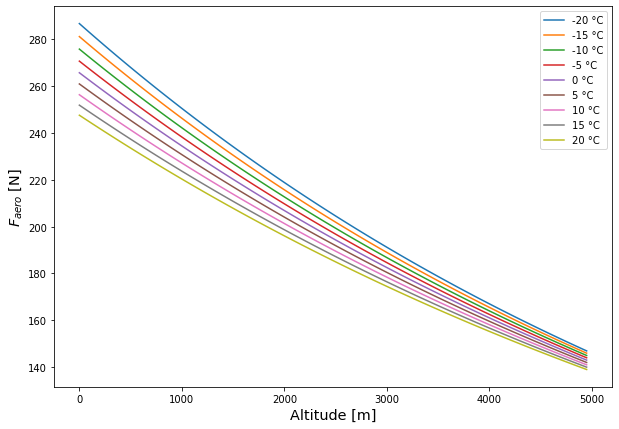

In [2]:
auto = query_vehicle('IONIQ Elektro')

plt.figure(figsize=(10,7))
for temp in range(-20,25,5):
    heights = [h for h in range(0,5000,50)]
    forces = [F_aero(speed=100, temp=temp, area= auto['area'][0], 
                c_drag=auto['dragFactor'][0], altitude=h, wind=0)
         for h in heights]
    plt.plot(heights, forces, label="{} °C".format(temp))
    plt.xlabel('Altitude [m]', fontsize='x-large')
    plt.ylabel(r'$F_{aero}$ [N]', fontsize='x-large')
    plt.legend()

#### Friction

Friction is another force that the motor needs to overcome. This force is depending on the total weight of the car, the inclination angle and the friction coefficient. 

<center>
$F_{fric} = \mu ~ m ~ g \cos\theta$ 
</center>

The friction coefficient $\mu$ depends on the material properties of both, tires (rubber) and road, as well on their conditions (wet, dry, smoothness, hardness). For instance, [$\mu = 0.011$](https://www.schweizer-fn.de/stoff/reibwerte/reibwerte_sonstige.php#lkw_reifen)  between tires and asphalt, and about 0.1 -0.35 between tires and sand.

Below there is a plot of $F_{fric}$ for different inclination angles $\theta$ for both wet and dry conditions.

The values of $\mu$ for rubber on asphalt for wet and dry conditions were taken from [this link](http://hpwizard.com/tire-friction-coefficient.html).

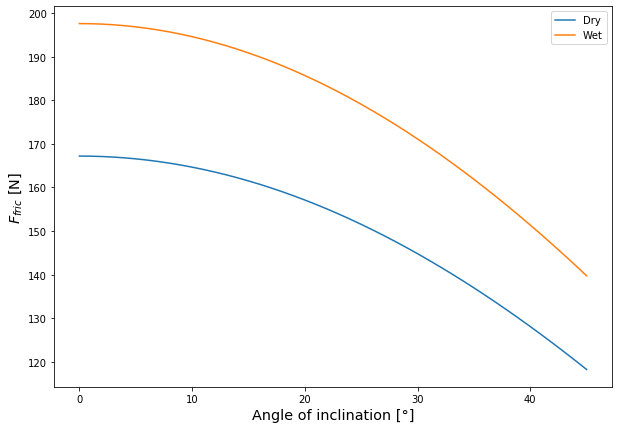

In [3]:
plt.figure(figsize=(10,7))

angles  = [theta for theta in range(46)]
forces_dry = [F_fric(mass=auto['emptyWeight'][0], alpha=np.radians(angle), wet=False)
         for angle in angles]
forces_wet = [F_fric(mass=auto['emptyWeight'][0], alpha=np.radians(angle), wet=True)
         for angle in angles]

plt.plot(angles, forces_dry, label="Dry")
plt.plot(angles, forces_wet, label="Wet")
plt.xlabel('Angle of inclination [°]', fontsize='x-large')
plt.ylabel(r'$F_{fric}$ [N]', fontsize='x-large')
plt.legend();

#### Gravity

Similar to $F_{fric}$, there is the gravitational force:

<center>
$F_{grav} = m~ g \sin\theta$ 
</center>

Here however, the inclination angle dependency is a function of $\sin$.

Below there is a figure, showing the dependency of $F_{grav}$ on the inclination angle. As observed in the figure, the steeper the road is, the larger the gravitational force. This will strongly influence the energetic battery consumption of the e-vehicle. For instance by driving uphill, the car will require more power to overcome $F_{grav}$. On the other hand, driving downhill, less energy is consumed and probably a recovery of battery energy can take place.

#### Acceleration

Finally, power is also required to accelerate the vehicle. The acceleration force $F_{acc}$ is expressed as 

<center>
$F_{acc} = m~a$
</center>

where $a$ is the acceleration. In this notebook, we will not consider the acceleration force. The reason for this is that, for our energy estimation we will consider energy consumption and drive range based on constant velocities, constant velocity means $a=0$, therefore $F_{acc} = 0$. However, one needs to keep in mind, that when driving on a highway the driver my change pace, i.e., slow down or accelerate due to traffic conditions or aggressive driving, this will obviously affect the energy demand on the battery.   

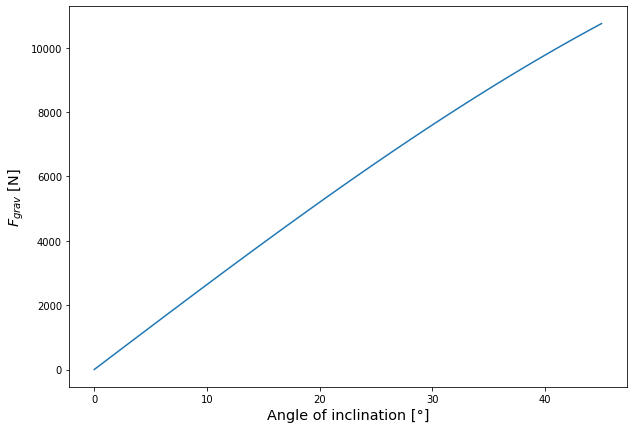

In [4]:
plt.figure(figsize=(10,7))

angles  = [theta for theta in range(46)]
forces_g = [F_gra(mass=auto['emptyWeight'][0], alpha=np.radians(angle))
         for angle in angles]

plt.plot(angles, forces_g)
plt.xlabel('Angle of inclination [°]', fontsize='x-large')
plt.ylabel(r'$F_{grav}$ [N]', fontsize='x-large');

## Use case: Trip from Hamburg to Munich

Consider an hypothetical trip from Hamburg to Munich. In this trip we will travel a distance of about 800 km along which there will be a lot of changes in altitude, which means we will be driving uphill and downhill. For such a typical route, it is of paramount importance to know how much power the battery has to provide in order to reach the final destination. With this information, together with the vehicle specific properties, we will be able estimate how far can one travel with the actual battery status, how many times a charging stop is required and also, how much time will the trip last taking into account driving time together with the time used while charging the battery. 

First, lets get from https://maps.openrouteservice.org/ route details that we need to estimate the energy requirements such as distance, altitude profile and steepness (angle of inclination).

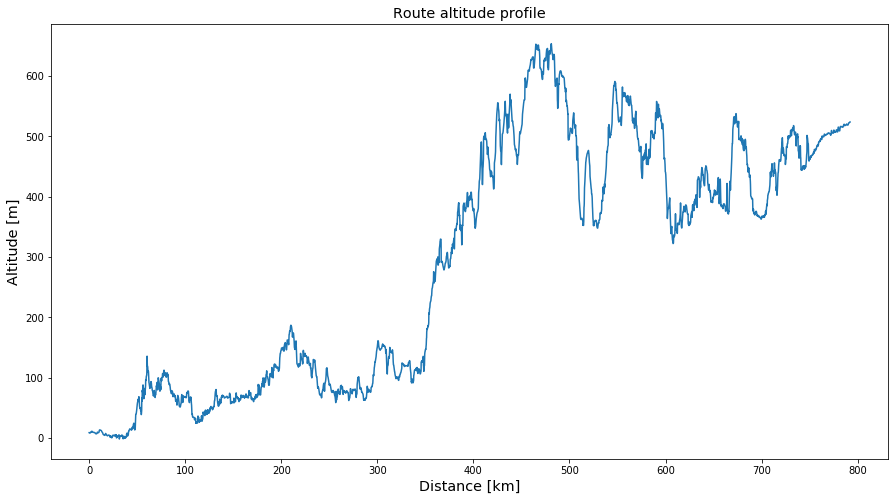

In [5]:
api_key = '5b3ce3597851110001cf62487d4fb586fbde48c4a1920afb15fe4220' #Provide your personal API key
clnt = client.Client(key=api_key) 

hamburg = [10.01534, 53.57532]
munich = [11.57549,48.13743]

# get route from openrouteservice
route = ors.directions.directions(clnt, coordinates=[hamburg, munich], profile = 'driving-car',
                                 instructions=False, elevation=True, extra_info=['steepness'])

geom = route['routes'][0]['geometry']

# extracts lat, lon and altitude
route_profile = pd.DataFrame(ors.convert.decode_polyline(geom,is3d=True)['coordinates'], 
                             columns=['lat','long','alt'])

# total route distance
trip_dist = round(route['routes'][0]['summary']['distance'])

#plot altitude profile
x = np.arange(0,trip_dist-1, trip_dist/(len(route_profile)))
plt.figure(figsize=(15,8))
plt.plot(x/1000, route_profile.alt)
plt.xlabel('Distance [km]', fontsize='x-large')
plt.ylabel('Altitude [m]', fontsize='x-large')
plt.title('Route altitude profile', fontsize='x-large')

#plot route on map
DE = [51.133481, 10.018343]

m = folium.Map(location=DE, zoom_start=6)

line = route_profile[['long','lat']]
start = hamburg[::-1] # inverts the position of lat, lon to lon, lat required by folium
end = munich[::-1]

folium.vector_layers.PolyLine(locations=line).add_to(m)
folium.Marker(start,popup="Start", icon = folium.Icon(icon="glyphicon-map-marker",color='red')).add_to(m)
folium.Marker(end,popup="End", icon = folium.Icon(icon="glyphicon-flag",color='green')).add_to(m)

m

In [6]:
st = route['routes'][0]['extras']['steepness']['summary']
steepness = pd.DataFrame({
    'distance': [dist['distance'] for dist in st],
    'steepness': [steepness['value'] for steepness in st]
})

steepness['inclination'] = steepness.steepness.apply(lambda x : x*3.2)
steepness['theta'] = steepness.inclination.apply(lambda x : np.arctan(x/100))
print("Table 2: Steepness")
print("Distance [m]: Total trip distance with a given steepness")
print("Steepness range (0: O%, 1: 1-3%, 2: 4-6%, 3: 7-9%, 4: 10-15%, 5: > 16%)")
print("Inclination [%]: Road Inclination")
print("theta [rad]: Road Inclination in radians")
steepness


Table 2: Steepness
Distance [m]: Total trip distance with a given steepness
Steepness range (0: O%, 1: 1-3%, 2: 4-6%, 3: 7-9%, 4: 10-15%, 5: > 16%)
Inclination [%]: Road Inclination
theta [rad]: Road Inclination in radians


distance  steepness  inclination     theta
0   568226.5        0.0          0.0  0.000000
1   108161.4        1.0          3.2  0.031989
2    94173.1       -1.0         -3.2 -0.031989
3     8976.2       -2.0         -6.4 -0.063913
4     8846.7        2.0          6.4  0.063913
5     1107.9        4.0         12.8  0.127308
6     1065.2        3.0          9.6  0.095707
7      836.5       -3.0         -9.6 -0.095707
8      368.7       -4.0        -12.8 -0.127308
9      263.9        5.0         16.0  0.158655
10     151.0       -5.0        -16.0 -0.158655

### Energy estimation

In classical mechanics, Work $W$, a function of energy, is the force $F$ times distance $s$. For a general path (route in our case), the mechanical work, or energy, can be expressed as the line integral of the Force along the path $C$ 

<center>
$$E=\int_C F\cdot ds$$
</center>

In our trip example, $s$ is the route distance that the vehicle drives from Hamburg to Munich, so we can interpret here work as the energy to drive the vehicle from the initial point $s_i$ (Hamburg) to final destination $s_f$ (Munich) along the whole route. 

#### $E_{fric}$ and $E_{grav}$ 


As the expressions for the $F_{fric}$ and $F_{grav}$ and forces are function of the angle $\theta$ it will be more convenient to express the $\sin\theta$ and $\cos\theta$ in terms of the altitude and distance. From **Fig 1.** (free body diagram) we obtain:


<center>
$\sin\theta = \frac{h}{s}$,  $\cos\theta = \frac{x}{s}$
</center>


For $E_{grav}$, using this form of the $\sin$ for the Energy integral we obtain:

<center>
$$E_{grav} = m~g \int \frac{dh}{ds} ds = m~g \int_{h_i}^{h_f}~dh$$

$$E_{grav} = m~g~(h_f - h_i)$$ 
</center>

This means that the total gravity energy required to bring the vehicle from Hamburg to Munich depends **only** on the initial and final altitude. At a first sight it might be surprising that, even though throughout the route we have been traveling successively up and down hill. The energy equations tell us that at the end, the total energy is independent of the path traveled. This property is known as the [fundamental theorem of calculus for line integrals](https://en.wikipedia.org/wiki/Gradient_theorem).

This, off course, considers an ideal situation where there is conservation of energy when traveling up and down hill. In reality, however, this does not happen, and there are energy losses, as well that there is not 100% energy recovery for the battery. This needs to be considered when estimating the total energy of the trip. 

Let us do the same analysis for energy demand due to friction

<center>
$$E_{fric} = \mu~m~g \int \frac{dx}{ds} ds = \mu~m~g \int_{0}^{x_f} dx$$

$$E_{fric} = \mu~m~g~x_f$$ 
</center>

From **Fig 1.** we have that $x = \sqrt{s^2 - h^2}$, and in this case $h = h_f - h_i$ hence and $s$ is the traveled distance.
<center>
$$E_{fric} = \mu~m~g~ \sqrt{s^2 - (h_f - h_i)^2}$$ 
</center>

Now that we have expressions for these energies lets try to calculate them for our Hamburg to Munich trip. We can use for this two approaches that we can compare. The first one is the one we just discussed. The second one is using values of steepness (road inclination) that we obtain from https://maps.openrouteservice.org/. 

In this second approach we can simplify the above integral by a sum of the products between trip segment distance $s_i$ and sines and cosines of the given inclination $\theta_i$ for that segment (see **Table 2**). So we have:

<center>
$$E_{fric} = \mu~m~g\sum_{i}\cos\theta_i~s_i$$
</center>

The same can be done for the energy due to gravity

<center>
$$E_{grav} = m~g\sum_{i}\sin\theta_i~s_i$$
</center>

Note, however, that this is still a rough estimation, since the given steepness is a value taken from a range, e.g., 1-3%, 4-5%, and not the actual inclination value. Still, it yields a very nice approximation to include the effect of steepness in our calculation.

In our Hamburg to Munich trip, and traveling with the Hyundai Ioniq, we obtain the following energy values.

In [7]:
mu = 0.011
m = auto.emptyWeight[0]
s = trip_dist
h_i = route_profile.alt.iloc[0]
h_f = route_profile.alt.iloc[-1]

# calc E using method 1 (integrals)
E_f_1 = (mu*m*ct.g*np.sqrt(s**2 - (h_f-h_i)**2))/3.6e6*100/(s/1000)
E_g_1 = (m*ct.g*(h_f-h_i))/3.6e6*100/(s/1000)

# calc E using method 2 (sums of trajectories*sin/cos)
E_f_2 = (mu*m*ct.g*steepness['distance']*np.cos(steepness['theta'])).sum()/3.6e6*100/(s/1000)
E_g_2 = (m*ct.g*steepness['distance']*np.sin(steepness['theta'])).sum()/3.6e6*100/(s/1000)

print('Method\t\tE_fric\tE_grav [kWh/100km)]')
print('='*50)
print('1 Integral\t{:.2f}\t{:.2f}'.format(E_f_1, E_g_1))
print('2 Sums\t\t{:.2f}\t{:.2f}'.format(E_f_2, E_g_2))
print('-'*50)

Method		E_fric	E_grav [kWh/100km)]
1 Integral	4.64	0.27
2 Sums		4.64	0.31
--------------------------------------------------


As shown, there is no difference between these methods for $E_{fric}$, although, for $E_{grav}$, method 1 shows a slightly lower value. Please keep in mind, that when using the sum method, the angles are rough estimations and not real actual angles, hence, one can expect that these differences come from this considerations.

####  $E_{aero}$

Regarding the energy required to overcome the wind resistance, the energy integral can be expressed as

<center>
$$E_{aero} = \frac{A~c_{drag}~p_0~M}{2~R~T}~(v-v_{wind})^2~\int_{s_i}^{s_f} \exp\left( \frac{-M~g~h(s)}{R~T}\right)~ds$$
</center>

Where $h(s)$ is the altitude as a function of the distance $s$. This function s know and corresponds to the Route altitude profile depicted in the figure above. We can numerically solve this integral and obtain the corresponding energies.

In the graph below, there is a graphical representation of this integral, which is the blue area under the curve.

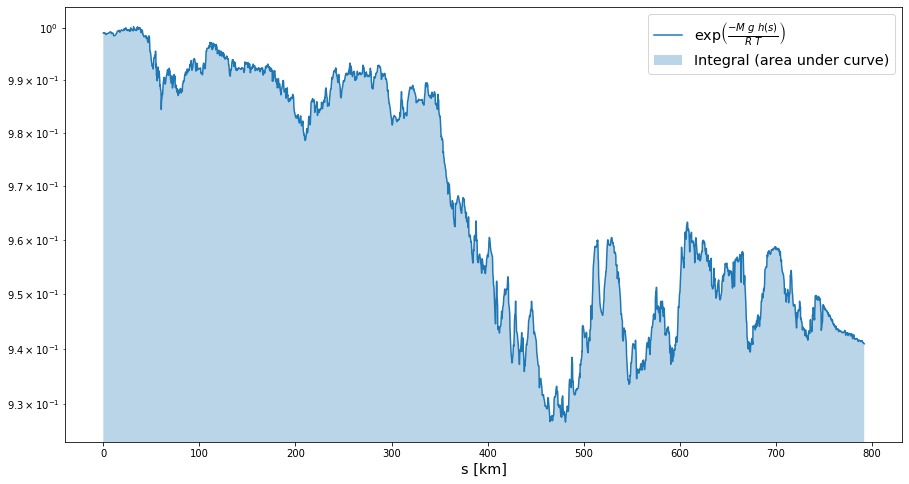

In [8]:
M = 0.0289
p0 = 101325
T = 20+273.15 # T in K
v = 100/3.6 # vel in m/s

s = np.arange(0,trip_dist-1, trip_dist/(len(route_profile)))
exp = np.exp(-M*ct.g*route_profile['alt']/(ct.R*T))

plt.figure(figsize=(15,8))
plt.fill_between(s/1000, exp, alpha =0.3, label='Integral (area under curve)' )
plt.plot(s/1000, exp, label= r'$\exp\left( \frac{-M~g~h(s)}{R~T}\right)$')
#plt.plot(x/1000, np.cos(thetas))
plt.xlabel('s [km]',fontsize='x-large')
plt.yscale('log')
plt.legend(fontsize='x-large');

In our example, if we assume that we travel at a constant velocity of 100 km/h, that the outer temperature is 20°C and constant through all the route and that there is no wind, $E_{aero}$ yields:

In [9]:
exp_int = auc(s, exp)

E_a = ((auto['area']*auto['dragFactor']*p0*M*v**2/(2*ct.R*T))[0]*exp_int/3.6e6)*100/(trip_dist/1000)
print('E_aero')
print('='*15)
print('{:.2f} kWh/100km'.format(E_a))
print('-'*15)

E_aero
6.63 kWh/100km
---------------


If we do not take into account the route profile $h(s)$ and calculate the energy under the same conditions as before ($v=100$ km/h, $v_{wind}=0$ and $T=20$ °C), but use only the altitude at the initial and final locations we get, as shown below, values similar to the one calculated using the integral of $h(s)~ds$. Moreover, the average value between these two is very close to the value obtained using the integral method.

In [10]:
E_a_i = F_aero(100, 20, auto.area[0], auto.dragFactor[0], route_profile.alt.iloc[0], wind=0)*100/3.6e6/(1/1000)
E_a_f = F_aero(100, 20, auto.area[0], auto.dragFactor[0], route_profile.alt.iloc[-1], wind=0)*100/3.6e6/(1/1000)
print('altitude [m]\tE_aero[kWh/100km]')
print('='*50)
print('{}\t\t{:.2f}'.format(route_profile.alt.iloc[0],E_a_i))
print('{}\t\t{:.2f}'.format(route_profile.alt.iloc[-1],E_a_f))
print('-'*50)
print('mean: {:.2f} kWh/100km'.format(np.mean([E_a_i,E_a_f])))

altitude [m]	E_aero[kWh/100km]
8.5		6.87
523.8		6.47
--------------------------------------------------
mean: 6.67 kWh/100km


#### Energy consumption due to auxiliary features 

As mentioned at the beginning, there are other energy demands coming from the vehicle electronics. These include, the audio system, lights, air condition, among others. Perhaps the largest consumption comes from the air condition system, that uses a lot of energy from the battery to heat up or cool down the air inside the vehicle.

From thermodynamics, the energy required to change the temperature of a volume of air $V$ from $T_i$ to $T_f$ is

<center>
$E =  \rho_{air}~c_p ~  V(T_i -T_f)$
</center>

With $\rho_{air}$ and $c_p$ being the air density and its specific heat, respectively.

Let us now calculate how much energy is required to heat the air inside the Hyundai Ioniq from -5°C to 15°C. The Ioniq dimensions as reported [here](https://www.automobiledimension.com/) are 4.470 x 1.820 x 1.450 $m^3$, Assuming that the air inside the cabin is just the half of this box volume, heating energy is: 


In [33]:
ioniq_vol = 4.470 *1.820 *1.450 
E_h = E_heating_ini(-5,15,ioniq_vol*0.5, route_profile.alt.iloc[0])
print('E_heat: {:.4f} kWh'.format(E_h))

E_heat: 0.0433 kWh


If we want this temperature to be changed in say 5 minutes, then the required power would be

In [34]:
P_h = E_h*60/5 
print('P_heat: {:.3f} kW'.format(P_h))

P_heat: 0.520 kW


However, in reality the power used to heat up the air in the cabin is much larger, as reported for some car users in [on-line forums](https://www.ioniqforum.com/threads/very-powerful-heat-pump.3785/). 

![power consumption](DSC_2049.jpg "Ioniq heating power consumption")

The problem to estimate the energy due to heating is that, the required energy to heat up the air in the cabin has a power demand profile, with two steps. One to warm up the cabin from a low temperature to the target temperature. Whereas the second step uses a smaller power to keep that air at the desired target temperature.

This means, that one probably needs to estimate an initial energy to warm up the cabin, and then calculate other consumption to keep this temperature.

We can use for this purpose an empiric formula that takes into account the temperature inside the cabin $T_{in}$, the outside temperature $T_{out}$ and the desired target temperature $T_{target}$. This formula ensures that, when $T_{target}$ is reached, the initial full power is switched off and only a smalles amount of power is used to keep the cabin temperature at the desired temp, as follows:


<center>
$$P_{heating} = f_i~ |(T_{in} -T_{target})| + f_k~ |(T_{in} -T_{out})|$$
</center>

Where $f_i$ = 0.2 kW/K is the heating factor to initially warm up the cabin's air and $f_k$ 0.02 kW/K the factor to keep the cabin at a constant temperature $T_{in}=T_{target}$. 

Below is a graph showing the behavior of such function when heating the cabin from -10 to 20°C. Here, we can see that as $T_{in}$ gets close to $T_{target}$, the power decreases and then it stays at about 0.6kW to keep the target temperature.

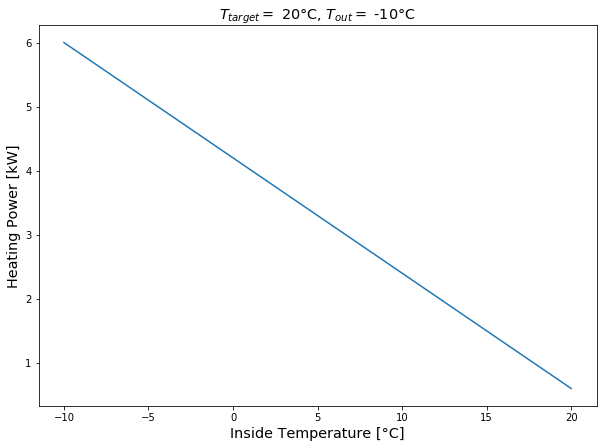

In [19]:
temps = range(-10,21)
p = [P_heating(t, -10, 20) for t in temps]
plt.figure(figsize=(10,7))
plt.plot(temps, p)
plt.xlabel('Inside Temperature [°C]', fontsize ='x-large')
plt.ylabel('Heating Power [kW]', fontsize ='x-large')
plt.title(r'$T_{target}=$ 20°C, $T_{out}=$ -10°C', fontsize ='x-large');

Additionally, the power required for the other electrical features like audio and lights we can initially estimate as to require 0.5kW in average.

### Energy Consumption, drive range, charge stops and total trip time

Alright, we have now, in principle, all what we need to estimate the consumption, drive range and how many charging stops would be required in order to reach our final destination.

#### Total route energy

The total energy required for the trip is, therefore:

<center>
$E_{Demand~Trip} [kWh]= E_{aero} + E_{fric} + E_{grav} + E_{heating} +E_{electronic}$
</center>

#### Recharge Energy

With this information, and knowing the energy that our battery stores we can estimate how much energy we need to recharge $E_{Charge}$ during the trip.

$E_{Charge}$, depends on $E_{Demand~Trip}$ and on the battery energy $E_{battery}$ and its State of Charge (SoC). For example, if $E_{Demand~Trip}$ is smaller than $E_{battery}$ at its actual State of Charge (SoC), there is no need to recharge. Otherwise, we need to charge.

To determine $E_{Charge}$ the following logic is applied:

````python
if E_battery*SoC < E_demand_trip:
    E_charge = E_demand_trip - E_battery*SoC + E_battery/4
else:
    E_charge = 0
````

We add the E_battery/4 for safety to avoid that the battery goes completely empty.

#### Number of charging stops

The number of charging stops will be 

<center>
Stops $=\frac{E_{Charge}}{E_{battery}}$
</center>

This number is a *float*, therefore, will take the *ceil* of this value, i.e., the next largest integer.

#### Energy Consumption and Drive Range

If the energy consumption is given by 

<center>
$$E_{Cons}~[kWh/km] =\frac{E_{Total}}{d}$$
</center>

where $d$ is the total trip distance, then the battery drive range can be estimated as

<center>
$$Range [km] = \frac{E_{battery}}{E_{Cons}}$$
</center>

This value is very important to determine where, within the route, we need to stop to recharge the battery. 

#### Drive and Charge time

Finally, the total driving time can be calculated from the mean drive velocity and the route distance

<center>
$$t_{drive}[h]= \frac{d}{v}$$
</center>
    
Whereas the charging time depends on the used Charging Power and the charging curve of the vehicle's battery, which will be implemented in the future. For now, we just consider that the charging power is constant throughout the charging process. 

Also, to compensate for time needed to drive in and out to the charging Station, an additional 10 minutes time will be added to the charging time.

<center>
$$t_{charging}[h]= \frac{E_{battery}}{P_{chargePoint}}$$
</center>
  
Let us now calculate all this values for our Hamburg to Munich trip for different velocities in order to find out which is the mean travel velocity that will take us to the final destination in the most efficient way.

The trip conditions for this example are:

Parameter | Value
---------|------
$v_{wind}$|  0 
add weight | 200 kg 
$T_{in}$ | 20°C
$T_{out}$ | 4°C
SoC Start | 100%
Charging Power | 65 kW
Dry road | True
Efficiency|0.9

It is also assumed that the air in the cabin is cold and needs to be heated up, thus, consuming more battery energy.

Below is a table with the values and a plot of Energy consumption, range and Drive/Charge Time as a function of the velocity.

In [53]:
print('+'*100)
print('Vehicle: {}'.format(auto.model[0]))
print('Start: Hamburg, End: Munich, Distance: {} km, Initial SoC: 100%, Charger Power: 65 kW'.format(trip_dist/1000))
print('-'*100)
a_ = autoEnergy(auto, 200, trip_dist, 20, 4, route_profile.alt.iloc[0], route_profile.alt.iloc[-1], 
                100, 65, 0)

round(a_.set_index('Velocity [km/h]'),2)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Vehicle: IONIQ Elektro
Start: Hamburg, End: Munich, Distance: 792.177 km, Initial SoC: 100%, Charger Power: 65 kW
----------------------------------------------------------------------------------------------------


E aero [kWh/100km]  E fric [kWh/100km]  \
Velocity [km/h]                                           
10                             0.07                5.24   
20                             0.29                5.24   
30                             0.65                5.24   
40                             1.16                5.24   
50                             1.82                5.24   
60                             2.62                5.24   
70                             3.56                5.24   
80                             4.65                5.24   
90                             5.89                5.24   
100                            7.27                5.24   
110                            8.79                5.24   
120                           10.46                5.24   
130                           12.28                5.24   
140                           14.24                5.24   
150                           16.35                5.24   
160                           18.60                5.24   
170                           21.00                5.24   
180                           23.54                5.24   
190                           26.23                5.24   
200                           29.06                5.24   

                 E gravity [kWh/100km]  E heating [kWh/100km]  \
Velocity [km/h]                                                 
10                                0.31                  32.00   
20                                0.31                  16.00   
30                                0.31                  10.67   
40                                0.31                   8.00   
50                                0.31                   6.40   
60                                0.31                   5.33   
70                                0.31                   4.57   
80                                0.31                   4.00   
90                                0.31                   3.56   
100                               0.31                   3.20   
110                               0.31                   2.91   
120                               0.31                   2.67   
130                               0.31                   2.46   
140                               0.31                   2.29   
150                               0.31                   2.13   
160                               0.31                   2.00   
170                               0.31                   1.88   
180                               0.31                   1.78   
190                               0.31                   1.68   
200                               0.31                   1.60   

                 E electric [kWh/100km]  E Total [kWh/100km]  Range [km]  \
Velocity [km/h]                                                            
10                                 5.00                47.36       59.12   
20                                 2.50                27.05      103.51   
30                                 1.67                20.60      135.91   
40                                 1.25                17.74      157.83   
50                                 1.00                16.41      170.61   
60                                 0.83                15.93      175.78   
70                                 0.71                16.00      175.00   
80                                 0.62                16.48      169.94   
90                                 0.56                17.28      162.05   
100                                0.50                18.36      152.54   
110                                0.45                19.68      142.30   
120                                0.42                21.22      131.94   
130                                0.38                22.98      121.86   
140                                0.36                24.93      112.31   
150                                0.33                27.08      103.4

The plot below shows the energy consumption, the drive range and the trip time as a function of velocity. From the figure and the table above, we can see that the best time efficiency is achieved when driving with an average velocity of 150km/h. Under this conditions we would need to stop 7 times to recharge, we will consume 4.14h charging and 5.28h driving for a total trip time of 9.54h. 

Note that, driving at a larger velocity will not bring us earlier to the final destination, since we will consume more energy and will need to spend more time in additional charging stops. 

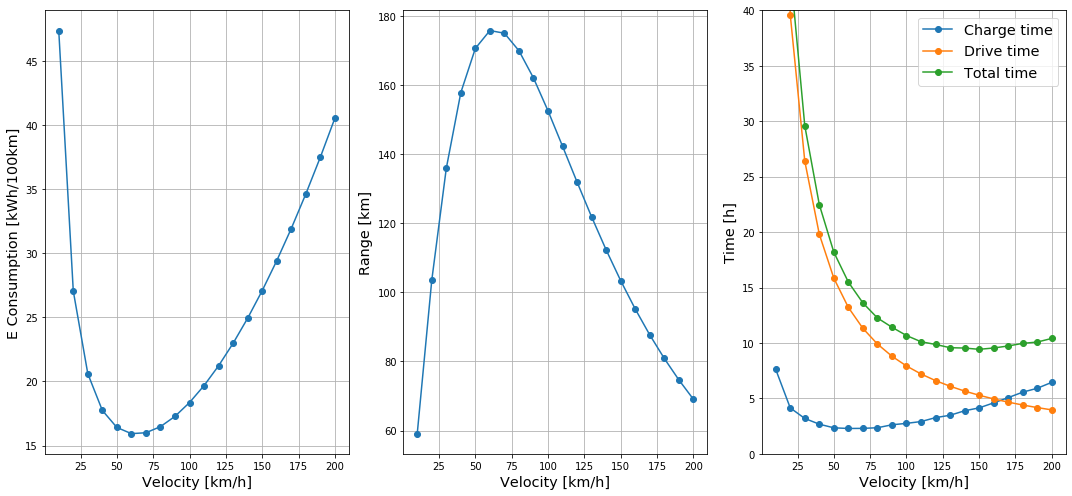

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15,7))

ax[0].plot(a_['Velocity [km/h]'],a_['E Total [kWh/100km]'], 'o-' )
ax[0].set_xlabel('Velocity [km/h]', fontsize='x-large')
ax[0].set_ylabel('E Consumption [kWh/100km]', fontsize='x-large')
ax[0].grid(True)
ax[1].plot(a_['Velocity [km/h]'],a_['Range [km]'], 'o-' )
ax[1].set_xlabel('Velocity [km/h]', fontsize='x-large')
ax[1].set_ylabel('Range [km]', fontsize='x-large')
ax[1].grid(True)
ax[2].plot(a_['Velocity [km/h]'],a_['Charging time [h]'], 'o-', label = 'Charge time' )
ax[2].plot(a_['Velocity [km/h]'],a_['Driving time [h]'], 'o-', label = 'Drive time' )
ax[2].plot(a_['Velocity [km/h]'],a_['Total time [h]'], 'o-', label = 'Total time' )
ax[2].set_xlabel('Velocity [km/h]', fontsize='x-large')
ax[2].set_ylabel('Time [h]', fontsize='x-large')
ax[2].set_ylim(0,40)
ax[2].legend(fontsize='x-large')
ax[2].grid(True)
plt.tight_layout()

Additionally, we can also have a closer look at the details of the energy consumption when driving at a constant velocity. For instance, we can analyze how much from the total consumption is spent in overcoming wind forces and friction, or how much energy goes into heating and electronic. The pie charts below show these contributions to the energy consumption when driving at a mean velocity of 20, 50, 100 and 150 km/h. We see for instance, that if we travel at 20km/h most of the energy is consumed by heating and electronics with about 76%. By going faster, the aerodynamic energy and friction, are the largest contributors to the consumption. For the optimum trip velocity (150km/h), 67% of the energy is used to overcome the wind resistance and 21.5% to overcome friction. Here heating is still about 8.8%. Switching off the heating will give us about 8.8% more driving range.

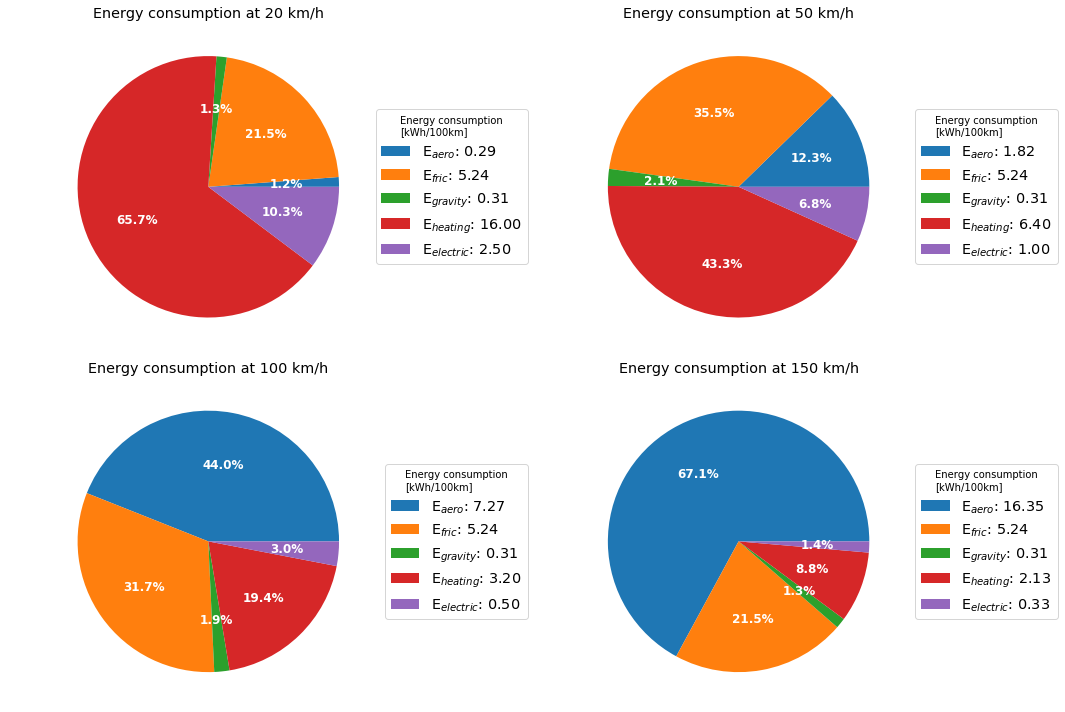

In [16]:
fig = plt.figure(figsize=(15,10))

for i, vel in enumerate([20,50,100,150]):
    mask = (a_['Velocity [km/h]']==vel)

    cols = ['E aero [kWh/100km]', 
            'E fric [kWh/100km]',
            'E gravity [kWh/100km]',
            'E heating [kWh/100km]',
            'E electric [kWh/100km]',
            ]

    sizes = a_[cols][mask].values[0]

    labels = [r'E$_{aero}$', 
              r'E$_{fric}$',
              r'E$_{gravity}$',
              r'E$_{heating}$', 
              r'E$_{electric}$', 
              ]

    labels = [label + ': {:.2f} '.format(sizes[i]) for i, label in enumerate(labels)]

    ax = fig.add_subplot(2,2,i+1)
    wedges, texts, autotexts = ax.pie(sizes,labels=labels, autopct='%1.1f%%',textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title="Energy consumption\n[kWh/100km]",
              fontsize='x-large',
              loc="center right",
              bbox_to_anchor=(1, 0, 0.5, 1)
              )

    plt.setp(autotexts, size=12, weight="bold")
    ax.set_title('Energy consumption at {} km/h'.format(vel), fontsize='x-large')
    plt.tight_layout()

To finalize, let us compare the optimum drive velocity for this route when driving different vehicles.

In [73]:
cols = ['Velocity [km/h]', 'E Total [kWh/100km]', 'Range [km]', 
        'Charging Stops','Charging time [h]', 'Driving time [h]', 'Total time [h]']

mod_comp = pd.DataFrame(columns=cols )
batt = []
for model in models:
    auto = auto = query_vehicle(model)
    batt.append(auto.nettoKwh[0])

    a_ = autoEnergy(auto, 200, trip_dist, 20, 4, route_profile.alt.iloc[0], route_profile.alt.iloc[-1], 
                100, 65, 0)
    
    mod_comp = pd.concat([mod_comp,a_[a_['Total time [h]'] == a_['Total time [h]'].min()][cols]])
mod_comp['Battery [kWh]'] = batt    
mod_comp.index = models    
round(mod_comp.sort_values(by='Total time [h]'), 2)

Velocity [km/h]  E Total [kWh/100km]  Range [km]  \
Model S 60D               150                30.29      178.28   
e-Niro 64 kWh             150                33.26      173.18   
KONA 64 kWh               150                33.29      173.03   
IONIQ Elektro             150                27.08      103.41   
KONA 39 kWh               140                29.94      117.92   

               Charging Stops  Charging time [h]  Driving time [h]  \
Model S 60D               4.0               3.74              5.28   
e-Niro 64 kWh             4.0               4.06              5.28   
KONA 64 kWh               4.0               4.06              5.28   
IONIQ Elektro             7.0               4.14              5.28   
KONA 39 kWh               6.0               4.24              5.66   

               Total time [h]  Battery [kWh]  
Model S 60D              9.02           54.0  
e-Niro 64 kWh            9.34           57.6  
KONA 64 kWh              9.34           57.6  
IONIQ Elektro            9.42           28.0  
KONA 39 kWh              9.90           35.3

As observed, the driving conditions are very similar for all the vehicles. Some of them will need to make more charging stops due to their smaller battery size. Others like the Kona 39kWh will need to drive a bit slower in order to complete the route in the shortest time. Don't forget, however, that so far we have not consider the battery charging curve, which will dramatically influence the charging time for the different vehicles.

## Summary

To summarize, we have estimated the energy required for an electric vehicle to drive from a starting point A to a final destination B along a determined route. For this estimation we have taken into account specific vehicle properties such as its weight, drag coefficient, and also route specific properties and conditions, such as altitude, wind velocity and temperature.

With this information we were able to estimate, the energy consumption, drive range, number of charging stops and total time required to finish the route. In this way we could easily identified which was the optimal average velocity that we need to keep throughout the route in order to reach our final destination in the shortest time.

For the future, we need to implement the charging curves of the vehicles for the charging time estimation. Also, an algorithm should be implemented that knowing the location of charge points along the route, finds the best combination of travel distance between charging stations and charging time, so that the total trip time is minimized.

In [17]:
from ipywidgets import interact, interactive, interact_manual, fixed
import ipywidgets as widgets

def plot_trip(model, add_weight, distance, t_in, t_out, h_start, h_end, soc_start, chargePointkW, wind, velocity):
    distance = distance * 1000
    auto = query_vehicle(model)
    a_ = autoEnergy(auto, add_weight, distance, t_in, t_out, h_start, h_end, soc_start, chargePointkW, wind)
    fig, ax = plt.subplots(2, 2, figsize=(15,10))
    
    mask = (a_['Velocity [km/h]']==velocity)

    ax[0,0].plot(a_['Velocity [km/h]'],a_['E Total [kWh/100km]'], 'o-' )
    ax[0,0].set_xlabel('Velocity [km/h]', fontsize='x-large')
    ax[0,0].set_ylabel('E Total [kWh/100km]', fontsize='x-large')
    ax[0,0].axhline(a_[mask]['E Total [kWh/100km]'].iloc[0],
                 ls=':')
    ax[0,0].axvline(velocity, ls=':')
    
    ax[0,1].plot(a_['Velocity [km/h]'],a_['Range [km]'], 'o-' )
    ax[0,1].set_xlabel('Velocity [km/h]', fontsize='x-large')
    ax[0,1].set_ylabel('Range [km]', fontsize='x-large')
    ax[0,1].axhline(a_[mask]['Range [km]'].iloc[0],
                 ls=':')
    ax[0,1].axvline(velocity, ls=':')
    
    ax[1,0].plot(a_['Velocity [km/h]'],a_['Charging time [h]'], 'o-', label = 'Charge time' )
    ax[1,0].plot(a_['Velocity [km/h]'],a_['Driving time [h]'], 'o-', label = 'Drive time')
    ax[1,0].plot(a_['Velocity [km/h]'],a_['Total time [h]'], 'o-', label = 'Total time')
    ax[1,0].axhline(a_[mask]['Total time [h]'].iloc[0],
                 ls=':')
    ax[1,0].axvline(velocity, ls=':')
    ax[1,0].set_xlabel('Velocity [km/h]', fontsize='x-large')
    ax[1,0].set_ylabel('Time [h]', fontsize='x-large')
    ax[1,0].set_ylim(0,a_['Total time [h]'].max()*0.4)
    ax[1,0].legend(fontsize='x-large')
    
    #############
    # pie chart #
    #############
    cols = ['E aero [kWh/100km]', 
            'E fric [kWh/100km]',
            'E gravity [kWh/100km]',
            'E heating [kWh/100km]',
            'E electric [kWh/100km]',
           ]
    
    sizes = a_[cols][mask].values[0]

    labels = [r'E$_{aero}$', 
              r'E$_{fric}$',
              r'E$_{gravity}$',
              r'E$_{heating}$', 
              r'E$_{electric}$', 
             ]

    labels = [label + ': {:.2f} '.format(sizes[i]) for i, label in enumerate(labels)]


    wedges, texts, autotexts = ax[1,1].pie(sizes,labels=labels, autopct='%1.1f%%',
                                           textprops=dict(color="w"))
#    ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax[1,1].legend(wedges, labels,
              title="Energy consumption\n[kWh/100km]",
              fontsize='x-large',
              loc="center right",
              bbox_to_anchor=(1, 0, 0.5, 1)
              )

    plt.setp(autotexts, size=12, weight="bold")
    ax[1,1].set_title('Energy consumption at {} km/h'.format(velocity), fontsize='x-large')
    plt.tight_layout()

models = ['IONIQ Elektro',"KONA 39 kWh", "KONA 64 kWh","Model S 60D","e-Niro 64 kWh"]

interact(plot_trip, model=models, add_weight=(0,500,100), distance=(100,1000,100), t_in=(0,25,5),
        t_out=(-10,35,5), h_start=(0,1000,100), h_end=(0,1000,100), soc_start=(20,100,10),
        chargePointkW=[50,65,150], wind=(-50,50,10), velocity=(10,190,10));

interactive(children=(Dropdown(description='model', options=('IONIQ Elektro', 'KONA 39 kWh', 'KONA 64 kWh', 'M…

https://maps.openrouteservice.org/directions?n1=50.942793&n2=10.93022&n3=7&a=53.576158,10.007046,48.152126,11.544467&b=0&c=0&k1=en-US&k2=km